<img src="Title.png">



In [1]:
# # Essential setup: Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Tensors & TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import numpy as np
print(np.__version__)

In [ ]:
np.set_printoptions(precision=3)
tf.random.set_seed(1)
np.random.seed(1)

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

<img src="ten.png" style="width:90%;">



In [ ]:
s = np.array(1)
print(s)
t_s = tf.convert_to_tensor(s)
t_s

In [ ]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3]])

print("a.shape", a.shape)
print("b.shape", b.shape)

In [ ]:
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print("t_a: ", t_a)
print("t_b: ", t_b)

In [ ]:
t2 = tf.constant([["hello", "world"], ["tensorflow", ""]])
t2

In [ ]:
tf.strings.length(tf.constant(["hello", "world"]))

# Solving an XOR classification problem

In [ ]:

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

# There are 3 ways to create a NN in TensorFlow:

## 1.  Keras Sequential API
Ideal for models with a single input and single output

In [ ]:
tf.random.set_seed(1)

model_seq = tf.keras.Sequential()
model_seq.add(tf.keras.layers.Dense(units=4, activation='relu'))
model_seq.add(tf.keras.layers.Dense(units=4, activation='relu'))
model_seq.add(tf.keras.layers.Dense(units=4, activation='relu'))
model_seq.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## late variable creation
model_seq.build(input_shape=(None, 2))

## display the structure
model_seq.summary()


In [ ]:
## compile:
model_seq.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist_seq = model_seq.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

history_seq = hist_seq.history

## Plotting the performance results of the sequentional model

In [ ]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history_seq['loss'], lw=4)
plt.plot(history_seq['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history_seq['binary_accuracy'], lw=4)
plt.plot(history_seq['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model_seq)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

TensorFlow/Keras assigns automatic names to layers and models unless manually sepecified:

`tf.keras.layers.Dense(32, name="my_dense_layer")`


The .compile() method prepares the model for training by specifying:

* **Optimizer**: Controls how the model learns from data (e.g. gradient descent).

* **Loss function**: Measures how far the model’s predictions are from the ground truth.

* **Metrics**: Determines what performance indicators to calculate during training and evaluation (e.g. accuracy, precision, recall).

## 2.  Keras Functional API
Ideal for models with multiple inputs/outputs, shared layers, skip connections, or custom topology

In [ ]:
# Input Layer: Define the input shape with 2 features
inputs = tf.keras.Input(shape=(2,))

# Hidden Layers: Fully connected (Dense) layer with 4 units and ReLU activation
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

# Output Layer: Single unit with sigmoid activation (ideal for binary classification)
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

# Build the Model: Declare the input and output tensors to construct the model
model_func = tf.keras.Model(inputs=inputs, outputs=outputs)

# Summary: Display model architecture, showing each layer's shape and parameter count
model_func.summary()

In [ ]:
## compile:
model_func.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist_func = model_func.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

history_func = hist_func.history

## Plotting the performance results of the functional model

In [ ]:
## Plotting

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history_func['loss'], lw=4)
plt.plot(history_func['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history_func['binary_accuracy'], lw=4)
plt.plot(history_func['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model_func)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## 3. Keras Subclassing API
The most flexible, and lowest level way to define neural network models

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)


## instantiating
model_sub = MyModel()
model_sub.build(input_shape=(None, 2))

model_sub.summary()





## compile:
model_sub.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist_sub = model_sub.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

## Plotting
history_sub = hist_sub.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history_sub['loss'], lw=4)
plt.plot(history_sub['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history_sub['binary_accuracy'], lw=4)
plt.plot(history_sub['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model_sub)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

 `model_sub.summary()` is showing all layers as "unbuilt" with zero parameters because, in the case of subclassed models in TensorFlow, calling `build()` with an input_shape doesn’t actually build the layers. It only sets the shape signature, it doesn't trigger layer creation the same way calling the model does.

To properly build and trace the model so `summary()` reflects its structure, run a forward pass using actual input data like this:



---

###  Layer 🆚 Compile 🆚 Build Configuration

| **Feature**         | **Layer Configuration**                             | **Compile Configuration**                                | **Build Configuration**                                   |
|---------------------|------------------------------------------------------|-----------------------------------------------------------|-----------------------------------------------------------|
| **Purpose**         | Defines model architecture                          | Prepares model for training                               | Initializes weights by specifying input shape             |
| **Scope**           | Per layer                                            | Entire model                                               | Entire model                                               |
| **Includes**        | Units, activation, initializers, regularizers       | Optimizer, loss function, metrics                         | Input shape only                                           |
| **Timing**          | During model definition                             | Before training starts                                     | Before model summary or training (if input shape missing) |
| **Affects**         | How model transforms input data                     | How model improves and measures progress                  | Whether internal weights/variables are created             |
| **Required?**       | Always (core to model structure)                    | Yes, if training/evaluation involved                      | Optional (but required if input shape isn't implicitly known) |

---



So in short:
- `layer config` defines *what the model looks like*
- `compile config` defines *how it learns*
- `build config` defines *when it becomes initialized and ready to work*


In [ ]:
dummy_input = tf.random.normal((1, 2))  # assuming your input has 2 features
_ = model_sub(dummy_input)              # triggers the layers to build
model_sub.summary()



---

### 🔍 Keras NN Model APIs Comparison

|**Feature**               |**Sequential API**                            |**Functional API**                                    |**Subclassing API**                                      |
|---------------------------|-----------------------------------------------|--------------------------------------------------------|-----------------------------------------------------------|
| **Simplicity**            | Simple                                          | Moderate                                               | Complicated                                                       |
| **Flexibility**           | Limited                                       | Extensive                                              | Maximum                                                   |
| **Supports branching**    | ❌ No                                         | ✅ Yes                                                 | ✅ Yes                                                    |
| **Code style**            | Layer list                                    | Graph-style connections                                | Custom Python class                                       |
| **Shared layers**         | ❌ Rarely                                     | ✅ Supported                                           | ✅ Supported                                              |
| **Custom logic**          | ❌ Not supported                              | ⚠️ Limited                                             | ✅ Fully customizable                                     |
| **Input/output handling** | Implicit                                      | Explicit                                               | Explicit                                                  |
| **Training customization**| ❌ Not customizable                           | ⚠️ Limited via subclassing `Model`                     | ✅ Override `train_step()` for full control               |
| **Readability**           | Very easy                                     | Moderate                                               | Most complex                                              |
| **Debuggability**         | Minimal                                       | Moderate                                               | Full Python debugging                                    |
| **Use Case**              | Quickly stacking layers for classification or regression tasks| Building models with multiple inputs or skip connections| Need for loops, conditionals, or non-standard training loops|
| **Example**              | Feedforward models (e.g. MNIST classification)| Multi-path models (e.g. ResNet, multi-modal inputs)    | GANs, reinforcement learning, or conditional architectures|
---


<img src="PROJECT.png">

## Do you have an eye for fashion? 👗 🧥

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# fachion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
# loading four sets of data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
print(len(training_images))
print(len(test_images))

60000
10000
60000
10000


In [4]:
# Display the second example
training_images[1]            # Behold! An interesting feature of Google Colab’s notebook interface

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [5]:
# Print the 10th row of the first image
print(training_images[0][9])


[  0   0   0   0   0   0   0   0   0   0   0   0   0 183 225 216 223 228
 235 227 224 222 224 221 223 245 173   0]


In [6]:
# Print the lables
print(training_labels[0:20])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


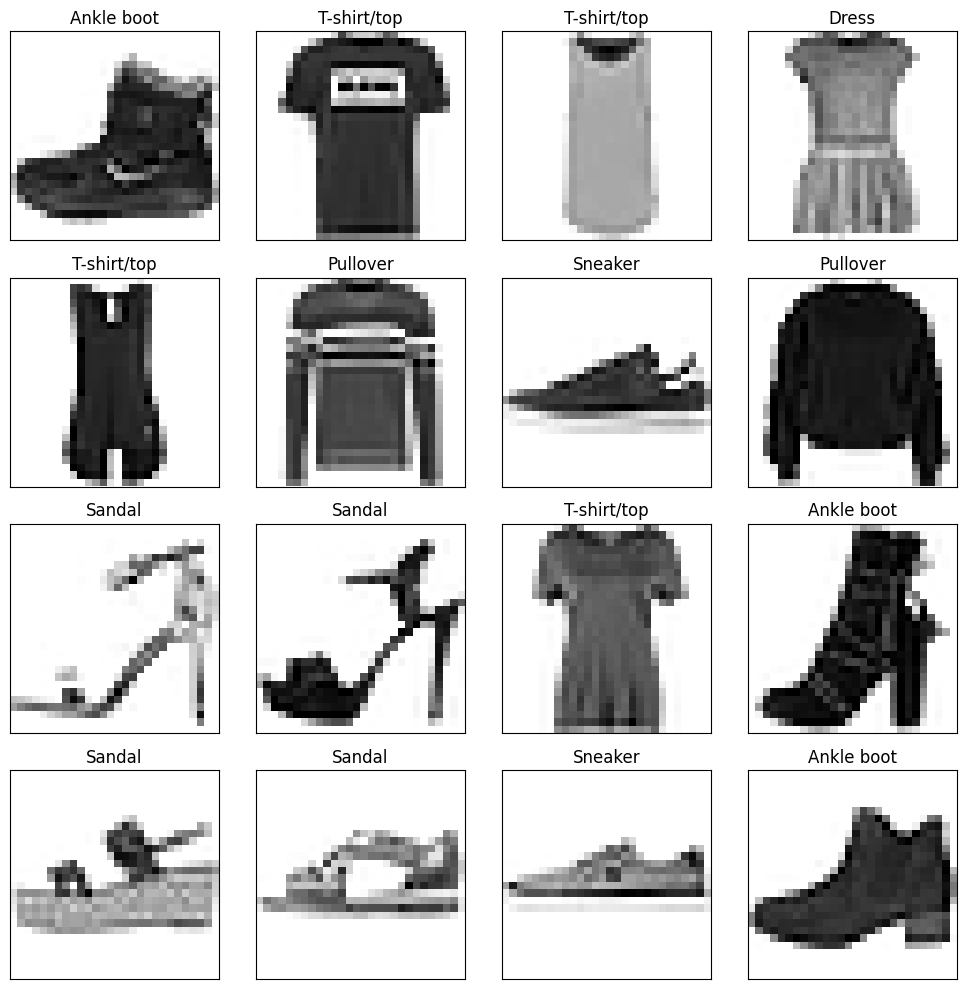

In [7]:
# Define class names for better readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 16 images in the training set
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)  # cmap=plt.cm.binary maps pixel values: 0 → white 255 → black
    plt.title(class_names[training_labels[i]])
plt.tight_layout()
plt.show()

Preprocessing for ML: Normalization

In [8]:
# normalization
training_images  = training_images / 255.0
test_images = test_images / 255.0

Separate validation sets

In [36]:
# Split training set into training and validation sets
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    training_images, training_labels, test_size=0.2, stratify=training_labels, random_state=42
)

Defining the model architecture

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),                            # No arguments needed; flattens input
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    # Positional + functional activation
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # softmax selects the highest probability: biggest output → 1 the rest → 0
])


Configuring the model hyperparameters for training

In [38]:
model.compile(optimizer = tf.keras.optimizers.Adam(),    # optimizer = 'adam'
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(training_images, training_labels,
                 epochs=5,
                 validation_data=(val_images, val_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.7823 - loss: 0.6221 - val_accuracy: 0.8602 - val_loss: 0.3895
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8625 - loss: 0.3827 - val_accuracy: 0.8844 - val_loss: 0.3204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8742 - loss: 0.3397 - val_accuracy: 0.8920 - val_loss: 0.3006
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8848 - loss: 0.3138 - val_accuracy: 0.8869 - val_loss: 0.3067
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8906 - loss: 0.2929 - val_accuracy: 0.8912 - val_loss: 0.2913


**Important Note:**
Never change a model hyperparameters withoud reruning the model defenition. The model has been trained and the initial states have changed!

Evaluate model performance on unseen data

In [39]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3621


[0.3710176348686218, 0.8669999837875366]

Get Prediction

In [40]:
# Make predictions on the test set
predictions = model.predict(test_images)
print(predictions[0])

# Convert prediction probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.8556485e-06 3.9568353e-09 1.6223247e-07 2.1265265e-09 1.0317937e-07
 2.2958182e-03 5.7631769e-07 2.2404375e-02 9.6571035e-05 9.7519946e-01]
9


Visualizing performance

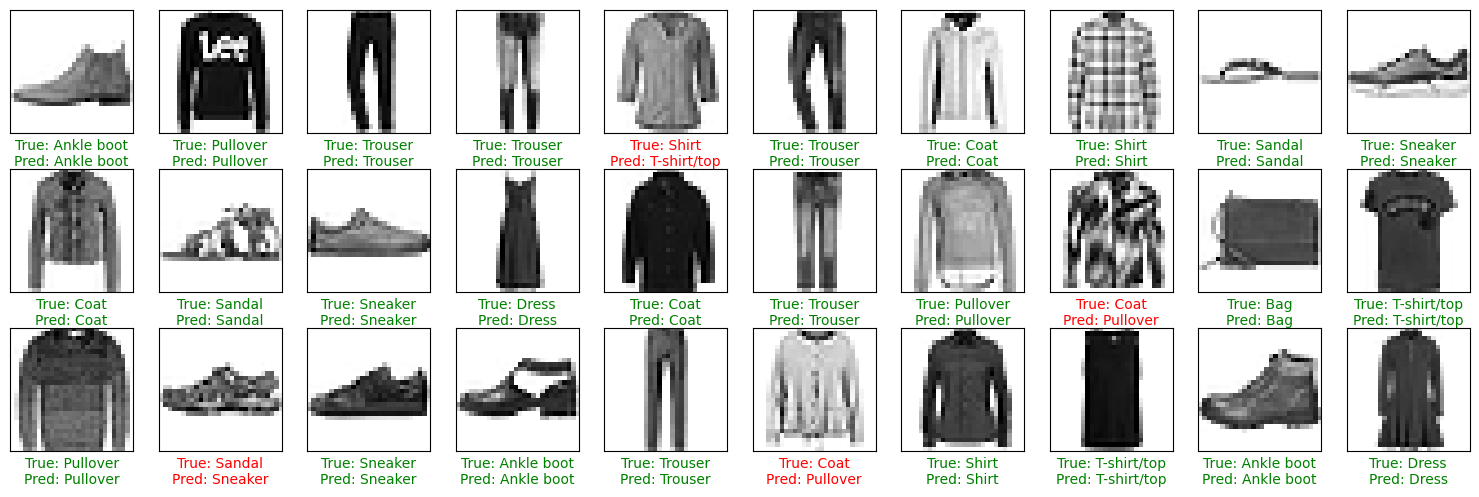

In [41]:
# Function to plot a few test images with predicted and true labels
def plot_predictions(images, true_labels, predicted_labels, class_names, num_images=30):
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        plt.subplot(3, num_images // 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)                         # Show the image
        true_name = class_names[true_labels[i]]                           # Get true class names
        pred_name = class_names[predicted_labels[i]]                      # Get predicted class names
        color = 'green' if true_name == pred_name else 'red'              # Color the label green if correct, red if incorrect
        plt.xlabel(f"True: {true_name}\nPred: {pred_name}", color=color)  # Label the image

    plt.tight_layout()
    plt.show()

# Call the function to plot predictions
plot_predictions(test_images, test_labels, predicted_labels, class_names)

Plot training curves

In [47]:
# Access training history
history = hist.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [48]:
def plot_training_curves(history):
    # Create figure
    fig = plt.figure(figsize=(16, 6))

    # Plot Loss
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(history['loss'], lw=3)
    ax1.plot(history['val_loss'], lw=3)
    ax1.set_title('Loss over Epochs', fontsize=16)
    ax1.set_xlabel('Epochs', fontsize=14)
    ax1.set_ylabel('Loss', fontsize=14)
    plt.grid(True)
    ax1.legend(['Train Loss', 'Validation Loss'], fontsize=12)

    # Plot Accuracy
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(history['accuracy'], lw=3)
    ax2.plot(history['val_accuracy'], lw=3)
    ax2.set_title('Accuracy over Epochs', fontsize=16)
    ax2.set_xlabel('Epochs', fontsize=14)
    ax2.set_ylabel('Accuracy', fontsize=14)
    plt.grid(True)
    ax2.legend(['Train Accuracy', 'Validation Accuracy'], fontsize=12)

    plt.tight_layout()
    plt.show()

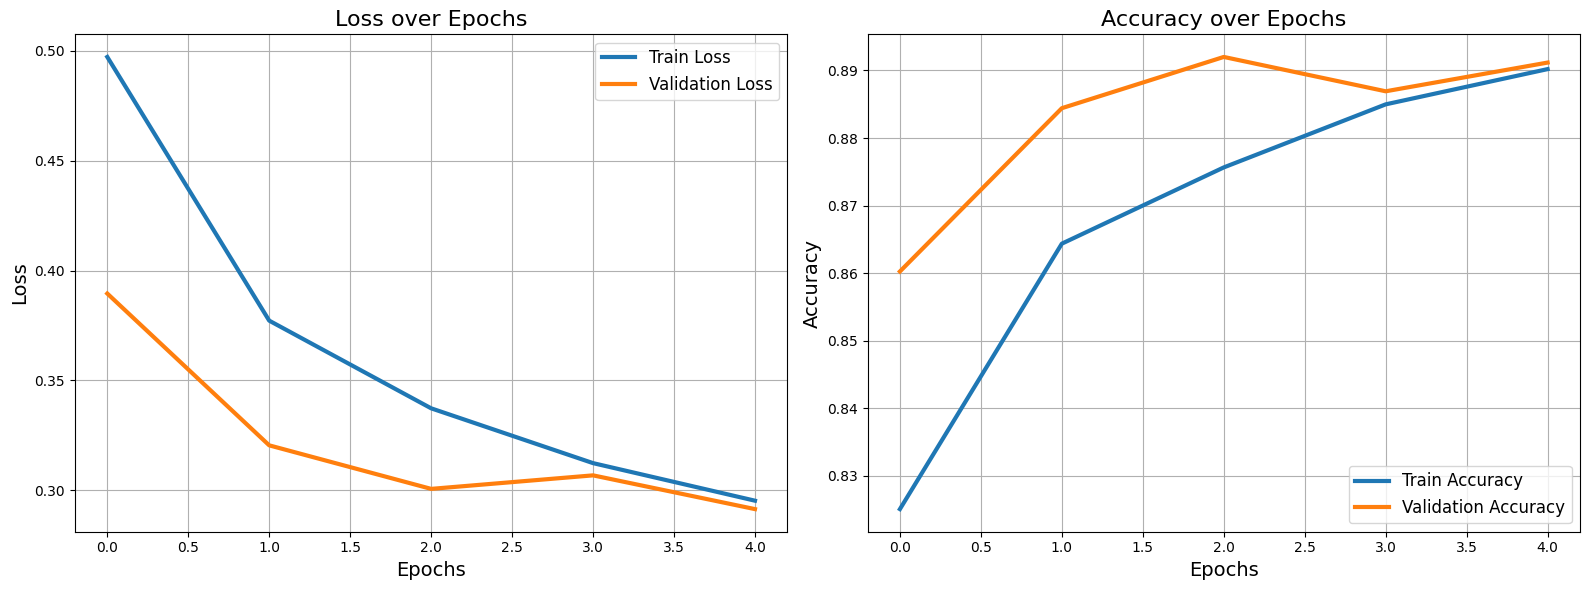

In [49]:
plot_training_curves(history)

<img src="structure.png">

### A Wider Model

In [ ]:
w_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

w_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

w_hist = w_model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=5)

w_model.evaluate(test_images, test_labels)

w_classifications = w_model.predict(test_images)

print(w_classifications[0])
print(test_labels[0])

w_history = w_hist.history
plot_training_curves(w_history)

### A Deeper Model

In [ ]:
d_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=128, activation='relu'),  # Named arguments  
                                    tf.keras.layers.Dense(units=128, activation='relu'), 
                                    tf.keras.layers.Dense(units=128, activation='relu'),
                                    tf.keras.layers.Dense(units=128, activation='relu'),
                                    tf.keras.layers.Dense(units=128, activation='relu'),
                                    tf.keras.layers.Dense(units=128, activation='relu'), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

d_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

d_hist = d_model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=5)

d_model.evaluate(test_images, test_labels)

d_classifications = d_model.predict(test_images)

print(d_classifications[0])
print(test_labels[0])

d_history = d_hist.history
plot_training_curves(d_history)

### More Epochs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Instruction:
# If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, 
#then stop the training and keep the best model you found.

early_stopping = EarlyStopping(
    min_delta=0.001,               # minimium amount of change to count as an improvement
    patience=20,                   # how many epochs to wait before stopping
    restore_best_weights=True,
) 


e_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

e_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

e_hist = e_model.fit(training_images, training_labels, validation_data=(val_images, val_labels), 
                     epochs=500,
                     callbacks=[early_stopping],    # put your callbacks in a list
                     verbose=0,                     # turn off training log
                     )

e_model.evaluate(test_images, test_labels)

e_classifications = e_model.predict(test_images)

print(e_classifications[0])
print(test_labels[0])

e_history = e_hist.history
plot_training_curves(e_history)

<img src="thankyou.png">


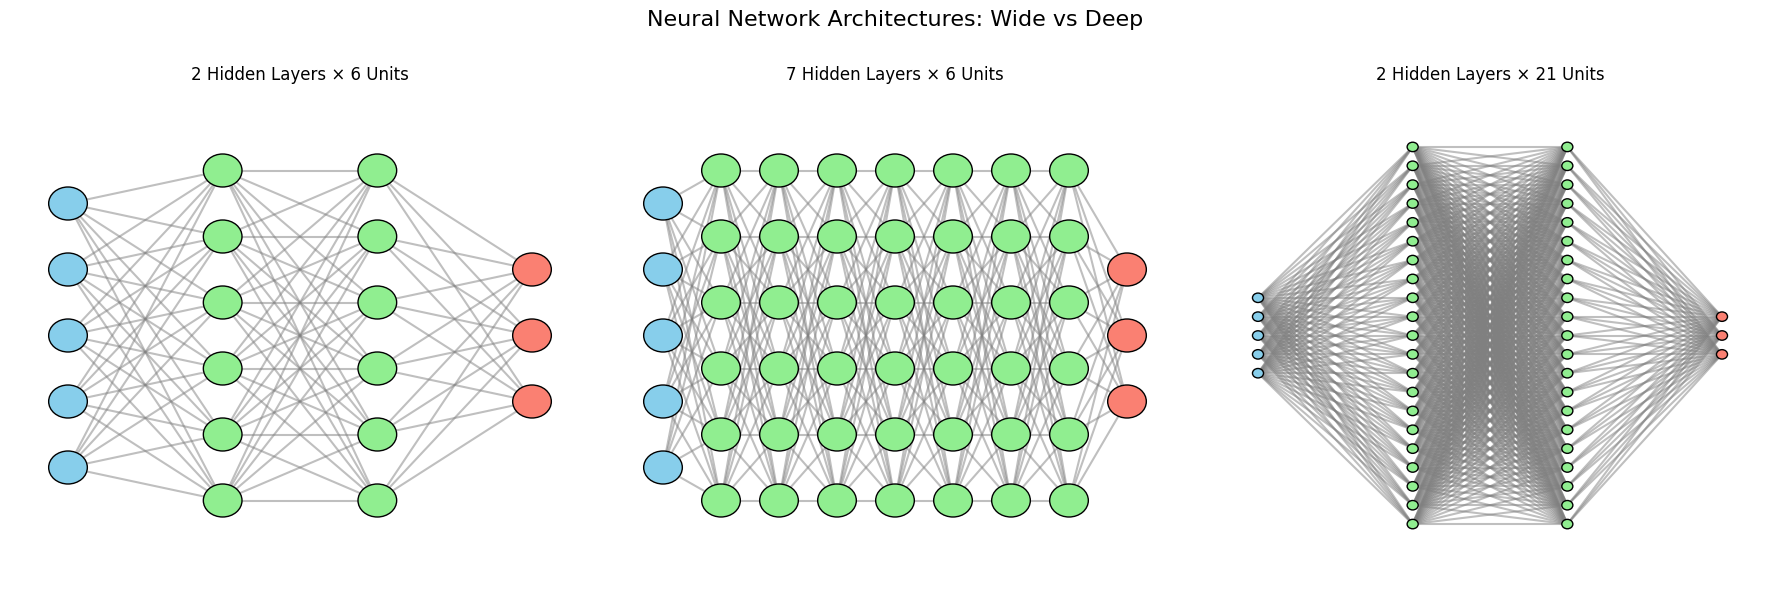

In [3]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(n_layers - 1)

    # Store node positions
    node_positions = {}

    for i in range(n_layers):
        layer_top = v_spacing*(layer_sizes[i]-1)/2. + (top + bottom)/2.

        # Choose color based on layer type
        if i == 0:
            color = 'skyblue'      # Input layer
        elif i == n_layers - 1:
            color = 'salmon'       # Output layer
        else:
            color = 'lightgreen'   # Hidden layers

        for j in range(layer_sizes[i]):
            x = left + i*h_spacing
            y = layer_top - j*v_spacing
            node_positions[(i, j)] = (x, y)
            circle = plt.Circle((x, y), v_spacing/4., color=color, ec='black', zorder=4)
            ax.add_artist(circle)

    # Draw edges
    for i in range(n_layers - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                x1, y1 = node_positions[(i, j)]
                x2, y2 = node_positions[(i+1, k)]
                line = plt.Line2D([x1, x2], [y1, y2], c='gray', alpha=0.5)
                ax.add_artist(line)

# Set up figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Neural Network Architectures: Wide vs Deep", fontsize=16)

# Network 1: 2 hidden layers, 6 units each
draw_neural_net(axes[0], .1, .9, .1, .9, [5, 6, 6, 3])
axes[0].set_title("2 Hidden Layers × 6 Units")
axes[0].axis('off')

# Network 2: 7 hidden layers, 6 units each
draw_neural_net(axes[1], .1, .9, .1, .9, [5] + [6]*7 + [3])
axes[1].set_title("7 Hidden Layers × 6 Units")
axes[1].axis('off')

# Network 3: 2 hidden layers, 21 units each
draw_neural_net(axes[2], .1, .9, .1, .9, [5, 21, 21, 3])
axes[2].set_title("2 Hidden Layers × 21 Units")
axes[2].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

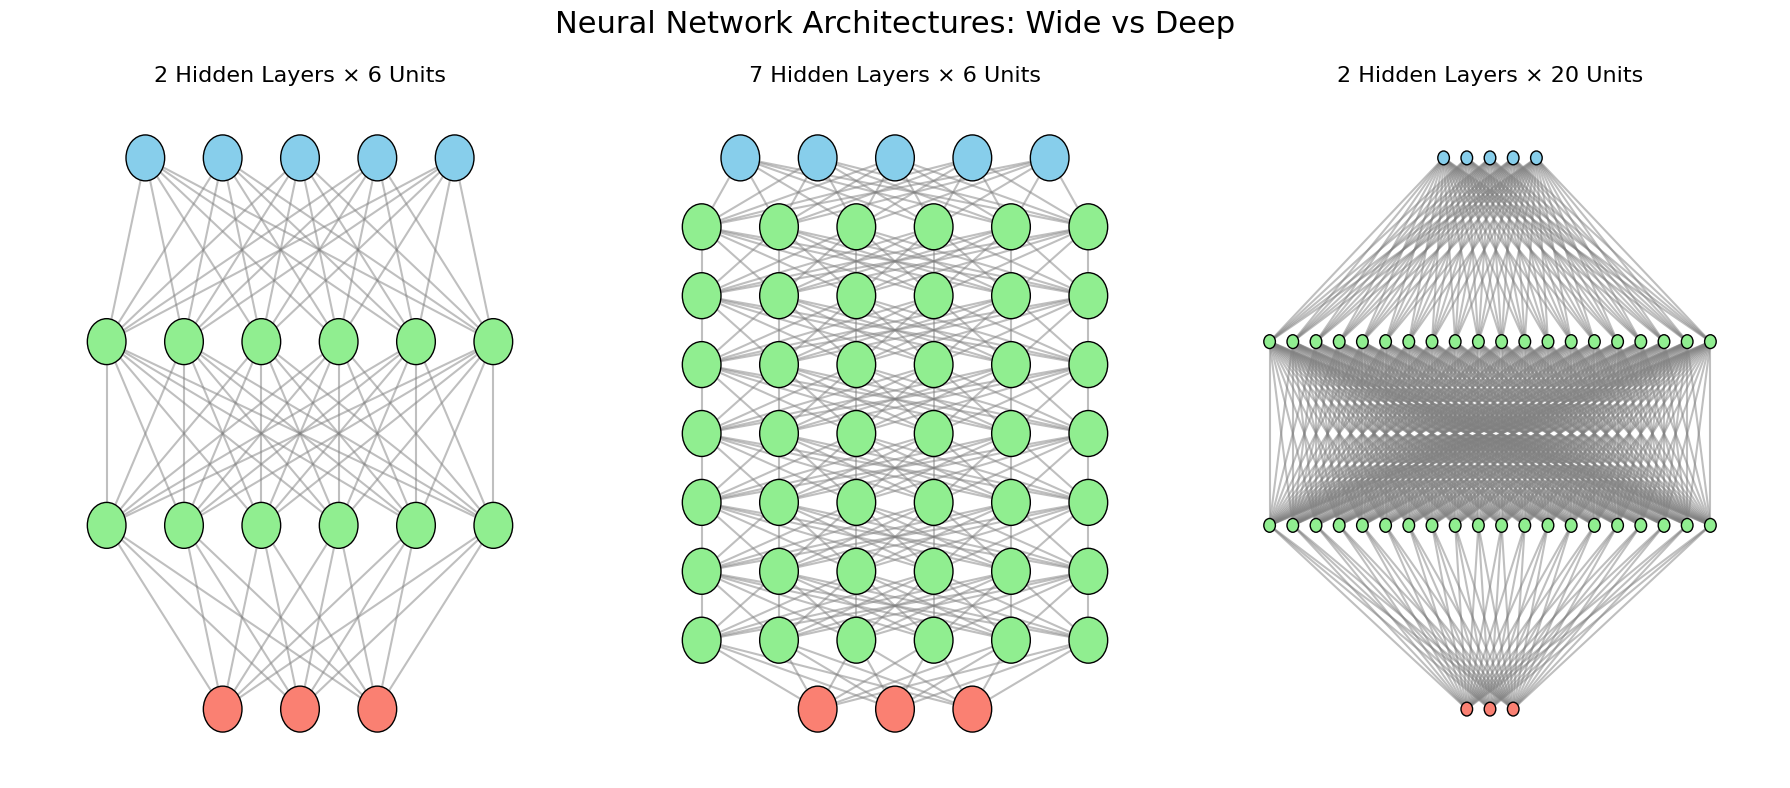

In [5]:
import matplotlib.pyplot as plt

def draw_vertical_net(ax, bottom, top, left, right, layer_sizes):
    n_layers = len(layer_sizes)
    h_spacing = (right - left)/float(max(layer_sizes))
    v_spacing = (top - bottom)/float(n_layers - 1)

    node_positions = {}

    for i in range(n_layers):
        layer_left = h_spacing*(layer_sizes[i]-1)/2. + (right + left)/2.

        # Choose color based on layer type
        if i == 0:
            color = 'skyblue'      # Input layer
        elif i == n_layers - 1:
            color = 'salmon'       # Output layer
        else:
            color = 'lightgreen'   # Hidden layers

        for j in range(layer_sizes[i]):
            y = top - i*v_spacing
            x = layer_left - j*h_spacing
            node_positions[(i, j)] = (x, y)
            circle = plt.Circle((x, y), h_spacing/4., color=color, ec='black', zorder=4)
            ax.add_artist(circle)

    # Draw edges
    for i in range(n_layers - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                x1, y1 = node_positions[(i, j)]
                x2, y2 = node_positions[(i+1, k)]
                line = plt.Line2D([x1, x2], [y1, y2], c='gray', alpha=0.5)
                ax.add_artist(line)

# Set up figure
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("Neural Network Architectures: Wide vs Deep", fontsize=22)

# Network 1: 2 hidden layers, 6 units each
draw_vertical_net(axes[0], .1, .9, .1, .9, [5, 6, 6, 3])
axes[0].set_title("2 Hidden Layers × 6 Units", fontsize=16)
axes[0].axis('off')

# Network 2: 7 hidden layers, 6 units each
draw_vertical_net(axes[1], .1, .9, .1, .9, [5] + [6]*7 + [3])
axes[1].set_title("7 Hidden Layers × 6 Units", fontsize=16)
axes[1].axis('off')

# Network 3: 2 hidden layers, 20 units each
draw_vertical_net(axes[2], .1, .9, .1, .9, [5, 20, 20, 3])
axes[2].set_title("2 Hidden Layers × 20 Units", fontsize=16)
axes[2].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()